In [172]:
import pandas as pd
import numpy as np


In [173]:
df=pd.read_csv("/content/drive/MyDrive/ecommerce-dataset.csv")

In [174]:
df.shape

(203, 9)

In [175]:
df.head()

,OrderID,CustomerID,OrderDate,ProductID,ProductCategory,Quantity,Price,TotalAmount,CustomerLocation
0,23f2da2d-4cc5-42e1-bc62-a7d0e42ea50a,4a1f73ba-3579-404f-b0a1-1815b470b8c2,2024-06-19,cdce9658-d862-4586-98ac-ab37934c7ac7,Electornics,5,140.57,NaN,Asia
1,8f9875b3-26d8-4a8c-9324-e2803f5a0204,ede013c6-46b3-49a7-97ea-ecc0955f3565,2024-03-30,ac917e14-629d-4140-9fea-9ee12eb441ac,Sportz,4,361.35,4205.49,Australia
2,1b7a4ea3-ea9f-4eb8-9d1d-62d316222797,a38beec4-baf2-49b9-abcb-61c01270ff80,2024-03-13,f278d163-d312-4e5c-bea3-351de7ab1597,Boks,9,22.73,1550.21,South America
3,9d3eef19-d02c-4526-9662-d87b7fe5c73f,bf74c160-73fb-4c3a-93a5-e78ec99ad9bb,2024-06-01,d7bbf3e9-b485-47ee-914c-42b7007b0a78,Beuty,2,15.15,3423.19,Asia
4,aac37d22-3bb4-4ebf-8e0e-fed315e2eb52,468bc959-9b09-419e-b1db-0f7729735237,2024-07-04,de5ddef2-c945-491e-a654-64dbbe50807b,Boks,10,398.59,3846.12,Australia


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderID           203 non-null    object 
 1   CustomerID        203 non-null    object 
 2   OrderDate         203 non-null    object 
 3   ProductID         203 non-null    object 
 4   ProductCategory   203 non-null    object 
 5   Quantity          203 non-null    int64  
 6   Price             202 non-null    float64
 7   TotalAmount       183 non-null    float64
 8   CustomerLocation  203 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 14.4+ KB


## Completness
Check for missing Values


In [177]:
missing_values=df.isnull().sum()
print(missing_values)

OrderID              0
CustomerID           0
OrderDate            0
ProductID            0
ProductCategory      0
Quantity             0
Price                1
TotalAmount         20
CustomerLocation     0
dtype: int64


In [178]:
missing_values=missing_values[missing_values>0]
print("Missing values per column :\n",missing_values)

Missing values per column :
 Price           1
TotalAmount    20
dtype: int64


In [179]:
print("missing values percentage :\n",(missing_values/len(df)*100).round(2))

missing values percentage :
 Price          0.49
TotalAmount    9.85
dtype: float64


##Accuracy


In [180]:
invalid_Quantity=df[(df['Quantity']<0) | (df['Quantity']>100)]
print("record that have Quantity <0 or Quantity>100 :\n",invalid_Quantity)

record that have Quantity <0 or Quantity>100 :
                                   OrderID  \
15   1adf1bdb-6fed-44eb-bedb-852f1cce93d1   
91   d77f1503-9505-4e76-bae0-59360170b948   
197  26b19dfe-8532-4d46-8e5d-3f4285a81960   

                               CustomerID   OrderDate  \
15   9f4bb174-aeb9-4209-bef5-602eebe36227  2024-07-17   
91   50c736d9-1d3c-4c2d-9d67-751a30f1568e  2024-07-23   
197  2ca222fd-cbc6-4166-95ad-1c81c6bc1e2a  2024-08-11   

                                ProductID ProductCategory  Quantity   Price  \
15   ac7d6d40-48d7-4014-b901-17c9570d9d3c            Boks        -5  190.21   
91   81200651-598c-4b62-9edb-d437a375545d             Hom       500  348.77   
197  cdbdb337-f839-408e-a9ae-1d3a25128961            Toyz      1000  254.63   

     TotalAmount CustomerLocation  
15       1839.61    North America  
91       3889.80    South America  
197      3838.19    South America  


In [181]:
invalid_price=df[(df["Price"]<0) | (df['Price']>1000)]
print("record that have price <0 or >1000 \n",invalid_price)

record that have price <0 or >1000 
                                   OrderID  \
27   3d85cd44-1426-4795-b1b2-7d3eb8daa7f2   
115  e79d67bc-ee1f-41e9-a8c5-13eeea8a1b08   
144  125f0449-ff5f-419c-bc42-61f1d96bad90   
170  486dd2b7-4be6-42a1-80ec-2994caa9df00   
189  b917e104-dfa4-4fa3-aa5d-778c60a8db84   

                               CustomerID   OrderDate  \
27   bc39066b-56b6-4aea-ad2f-90737deb9011  2024-09-20   
115  d8cc46b1-4151-448b-9c47-f55e2d2f9d86  2024-05-08   
144  76ebbb2e-c614-473c-a05d-3ab355414aa0  2024-08-14   
170  6a07a3b5-b3b2-4a37-b7e2-8bfd431c912f  2024-07-07   
189  a77ff11f-9b01-4a33-9728-e0d3c16bde7f  2024-01-28   

                                ProductID ProductCategory  Quantity    Price  \
27   e49f8697-5fd0-4911-8963-3a4bc08c45ef           Beuty         2  2039.05   
115  3220a4a8-b610-4b24-a102-0a09328ec7da            Boks         5  2510.60   
144  36b1b2cc-d55b-4f68-b0be-a7420f3b07e3            Boks         6    -1.00   
170  047ee7a0-e709-413f-8955-

outlier_Quantity

In [182]:
Q1_Quantity=df['Quantity'].quantile(0.25)
Q3_Quantity=df['Quantity'].quantile(0.75)
IQR_Quantity=Q3_Quantity-Q1_Quantity
outlier_Quantity=df[(df['Quantity']<Q1_Quantity-1.5*IQR_Quantity) | (df['Quantity']>Q3_Quantity+1.5*IQR_Quantity)]
print(outlier_Quantity[["OrderID","Quantity"]])

                                  OrderID  Quantity
15   1adf1bdb-6fed-44eb-bedb-852f1cce93d1        -5
91   d77f1503-9505-4e76-bae0-59360170b948       500
162  106f4e7f-311e-42da-9d66-5a38c24d532f       100
197  26b19dfe-8532-4d46-8e5d-3f4285a81960      1000


Outlier_price

In [183]:
Q1_price=df['Price'].quantile(0.25)
Q3_price=df['Price'].quantile(0.75)
IQR_price=Q3_price-Q1_price
outlier_price=df[(df['Price']<Q1_price-1.5*IQR_price) | (df['Price']>Q3_price+1.5*IQR_price)]
print(outlier_price[["OrderID","Price"]])

                                  OrderID    Price
27   3d85cd44-1426-4795-b1b2-7d3eb8daa7f2  2039.05
115  e79d67bc-ee1f-41e9-a8c5-13eeea8a1b08  2510.60
170  486dd2b7-4be6-42a1-80ec-2994caa9df00  3037.17


Outlier_TotalAmount

In [184]:
Q1_totalamount=df['TotalAmount'].quantile(0.25)
Q3_totalamount=df['TotalAmount'].quantile(0.75)
IQR_totalamount=Q3_totalamount-Q1_totalamount
outlier_totalamount=df[(df['TotalAmount']<Q1_totalamount-1.5*IQR_totalamount) | (df['TotalAmount']>Q3_totalamount+1.5*IQR_totalamount)]
print(outlier_totalamount[["OrderID","TotalAmount"]])


Empty DataFrame
Columns: [OrderID, TotalAmount]
Index: []


In [185]:
print(outlier_totalamount.nunique( ))

OrderID             0
CustomerID          0
OrderDate           0
ProductID           0
ProductCategory     0
Quantity            0
Price               0
TotalAmount         0
CustomerLocation    0
dtype: int64


## Consistency

In [186]:
print(df['ProductCategory'].unique())
print(df['ProductCategory'].nunique())

['Electornics' 'Sportz' 'Boks' 'Beuty' 'Toyz' 'Hom' 'Clothng']
7


In [187]:
print(df['ProductCategory'].value_counts())

ProductCategory
Toyz           37
Beuty          33
Sportz         31
Boks           31
Electornics    25
Clothng        25
Hom            21
Name: count, dtype: int64


In [188]:
df["calculation_total_amount"]=df['Quantity']*df['Price']
inconsistent_amount=df[np.abs(df['TotalAmount']-df['calculation_total_amount'])>1]
print(inconsistent_amount)

                                  OrderID  \
1    8f9875b3-26d8-4a8c-9324-e2803f5a0204   
2    1b7a4ea3-ea9f-4eb8-9d1d-62d316222797   
3    9d3eef19-d02c-4526-9662-d87b7fe5c73f   
4    aac37d22-3bb4-4ebf-8e0e-fed315e2eb52   
5    0a30a255-2908-49c1-8b4c-f406ad21e2ab   
..                                    ...   
198  6f3454e0-d61c-4fac-b11f-899579eea857   
199  e842be8d-0a97-46f9-aaf5-0770a2081bc4   
200  599691d6-1565-4e5d-9455-81daa5d01c19   
201  c8099ccb-e5a6-4eb5-b92f-2cd145f6bee6   
202  26b19dfe-8532-4d46-8e5d-3f4285a81960   

                               CustomerID   OrderDate  \
1    ede013c6-46b3-49a7-97ea-ecc0955f3565  2024-03-30   
2    a38beec4-baf2-49b9-abcb-61c01270ff80  2024-03-13   
3    bf74c160-73fb-4c3a-93a5-e78ec99ad9bb  2024-06-01   
4    468bc959-9b09-419e-b1db-0f7729735237  2024-07-04   
5    2a6ba43a-0ec3-4460-927f-ebc215777894  2024-02-16   
..                                    ...         ...   
198  8c363beb-3038-4d2f-9199-333c0927717d  2024-05-06   
199

In [189]:
print(len(inconsistent_amount))

182


In [190]:
df['OrderDate'].max()

'2025-01-30 00:00:00'

##Timeliness

In [191]:
df.dtypes

,0
OrderID,object
CustomerID,object
OrderDate,object
ProductID,object
ProductCategory,object
Quantity,int64
Price,float64
TotalAmount,float64
CustomerLocation,object
calculation_total_amount,float64


In [192]:
df['OrderDate']=pd.to_datetime(df['OrderDate'],format='mixed',errors='coerce')


In [193]:
df.dtypes

,0
OrderID,object
CustomerID,object
OrderDate,datetime64[ns]
ProductID,object
ProductCategory,object
Quantity,int64
Price,float64
TotalAmount,float64
CustomerLocation,object
calculation_total_amount,float64


In [200]:
df['OrderDate'].min()

Timestamp('2024-01-03 00:00:00')

In [194]:
df['OrderDate'].max()

Timestamp('2025-01-30 00:00:00')

In [196]:
error_in_time=df[df['OrderDate']>pd.Timestamp.today()]
print("Record with order date in future : \n",len(error_in_time))

Record with order date in future : 
 0


#completeness for date

In [197]:
df["month_year"]=df['OrderDate'].dt.to_period("M")
df.head(2)

,OrderID,CustomerID,OrderDate,ProductID,ProductCategory,Quantity,Price,TotalAmount,CustomerLocation,calculation_total_amount,month_year
0,23f2da2d-4cc5-42e1-bc62-a7d0e42ea50a,4a1f73ba-3579-404f-b0a1-1815b470b8c2,2024-06-19,cdce9658-d862-4586-98ac-ab37934c7ac7,Electornics,5,140.57,NaN,Asia,702.85,2024-06
1,8f9875b3-26d8-4a8c-9324-e2803f5a0204,ede013c6-46b3-49a7-97ea-ecc0955f3565,2024-03-30,ac917e14-629d-4140-9fea-9ee12eb441ac,Sportz,4,361.35,4205.49,Australia,1445.40,2024-03


In [198]:
df['month_year'].value_counts().sort_index()

,count
month_year,
2024-01,16
2024-02,14
2024-03,21
2024-04,18
2024-05,20
2024-06,15
2024-07,26
2024-08,18
2024-09,24


a completeness check was perforemed by generating month_tear field from the orderdate and comparing it to the expected time range   
several month were found to be missing ,which could indicate data ingestion gaps or period with no recorded activity

##uniqueness
check for duplicated


In [ ]:
duplicated_orders=df[df['OrderID'].duplicated()]
print(len(duplicated_orders))

3


In [ ]:
print(duplicated_orders)

                                  OrderID  \
200  599691d6-1565-4e5d-9455-81daa5d01c19   
201  c8099ccb-e5a6-4eb5-b92f-2cd145f6bee6   
202  26b19dfe-8532-4d46-8e5d-3f4285a81960   

                               CustomerID  OrderDate  \
200  777f4a56-070c-40e8-9d17-5fb5d005155c 2024-10-04   
201  b9d98f30-f25e-49ae-b266-a8c423d7a4fe 2024-07-17   
202  2ca222fd-cbc6-4166-95ad-1c81c6bc1e2a 2024-08-11   

                                ProductID ProductCategory  Quantity   Price  \
200  41ed0ad7-f799-4296-88d4-49353b816204            Boks         3  390.95   
201  532bf37f-9701-4fd0-bda3-4376f5e617ce            Toyz         9  450.38   
202  cdbdb337-f839-408e-a9ae-1d3a25128961            Toyz         9  254.63   

     TotalAmount CustomerLocation  calculation_total_amount  
200      2682.39             Asia                   1172.85  
201      1601.37           Africa                   4053.42  
202      3838.19    South America                   2291.67  


In [ ]:
df[df.duplicated(subset=None,keep=False)]

,OrderID,CustomerID,OrderDate,ProductID,ProductCategory,Quantity,Price,TotalAmount,CustomerLocation,calculation_total_amount
70,599691d6-1565-4e5d-9455-81daa5d01c19,777f4a56-070c-40e8-9d17-5fb5d005155c,2024-10-04,41ed0ad7-f799-4296-88d4-49353b816204,Boks,3,390.95,2682.39,Asia,1172.85
84,c8099ccb-e5a6-4eb5-b92f-2cd145f6bee6,b9d98f30-f25e-49ae-b266-a8c423d7a4fe,2024-07-17,532bf37f-9701-4fd0-bda3-4376f5e617ce,Toyz,9,450.38,1601.37,Africa,4053.42
200,599691d6-1565-4e5d-9455-81daa5d01c19,777f4a56-070c-40e8-9d17-5fb5d005155c,2024-10-04,41ed0ad7-f799-4296-88d4-49353b816204,Boks,3,390.95,2682.39,Asia,1172.85
201,c8099ccb-e5a6-4eb5-b92f-2cd145f6bee6,b9d98f30-f25e-49ae-b266-a8c423d7a4fe,2024-07-17,532bf37f-9701-4fd0-bda3-4376f5e617ce,Toyz,9,450.38,1601.37,Africa,4053.42


In [ ]:
df[df.duplicated(subset=["OrderID"],keep=False)]

,OrderID,CustomerID,OrderDate,ProductID,ProductCategory,Quantity,Price,TotalAmount,CustomerLocation,calculation_total_amount
70,599691d6-1565-4e5d-9455-81daa5d01c19,777f4a56-070c-40e8-9d17-5fb5d005155c,2024-10-04,41ed0ad7-f799-4296-88d4-49353b816204,Boks,3,390.95,2682.39,Asia,1172.85
84,c8099ccb-e5a6-4eb5-b92f-2cd145f6bee6,b9d98f30-f25e-49ae-b266-a8c423d7a4fe,2024-07-17,532bf37f-9701-4fd0-bda3-4376f5e617ce,Toyz,9,450.38,1601.37,Africa,4053.42
197,26b19dfe-8532-4d46-8e5d-3f4285a81960,2ca222fd-cbc6-4166-95ad-1c81c6bc1e2a,2024-08-11,cdbdb337-f839-408e-a9ae-1d3a25128961,Toyz,1000,254.63,3838.19,South America,254630.00
200,599691d6-1565-4e5d-9455-81daa5d01c19,777f4a56-070c-40e8-9d17-5fb5d005155c,2024-10-04,41ed0ad7-f799-4296-88d4-49353b816204,Boks,3,390.95,2682.39,Asia,1172.85
201,c8099ccb-e5a6-4eb5-b92f-2cd145f6bee6,b9d98f30-f25e-49ae-b266-a8c423d7a4fe,2024-07-17,532bf37f-9701-4fd0-bda3-4376f5e617ce,Toyz,9,450.38,1601.37,Africa,4053.42
202,26b19dfe-8532-4d46-8e5d-3f4285a81960,2ca222fd-cbc6-4166-95ad-1c81c6bc1e2a,2024-08-11,cdbdb337-f839-408e-a9ae-1d3a25128961,Toyz,9,254.63,3838.19,South America,2291.67


In [ ]:
duplicated_customerID=df[df['CustomerID'].duplicated()]
print(len(duplicated_customerID))

3


In [ ]:
df[df.duplicated(subset=["CustomerID"],keep=False)]

,OrderID,CustomerID,OrderDate,ProductID,ProductCategory,Quantity,Price,TotalAmount,CustomerLocation,calculation_total_amount
70,599691d6-1565-4e5d-9455-81daa5d01c19,777f4a56-070c-40e8-9d17-5fb5d005155c,2024-10-04,41ed0ad7-f799-4296-88d4-49353b816204,Boks,3,390.95,2682.39,Asia,1172.85
84,c8099ccb-e5a6-4eb5-b92f-2cd145f6bee6,b9d98f30-f25e-49ae-b266-a8c423d7a4fe,2024-07-17,532bf37f-9701-4fd0-bda3-4376f5e617ce,Toyz,9,450.38,1601.37,Africa,4053.42
197,26b19dfe-8532-4d46-8e5d-3f4285a81960,2ca222fd-cbc6-4166-95ad-1c81c6bc1e2a,2024-08-11,cdbdb337-f839-408e-a9ae-1d3a25128961,Toyz,1000,254.63,3838.19,South America,254630.00
200,599691d6-1565-4e5d-9455-81daa5d01c19,777f4a56-070c-40e8-9d17-5fb5d005155c,2024-10-04,41ed0ad7-f799-4296-88d4-49353b816204,Boks,3,390.95,2682.39,Asia,1172.85
201,c8099ccb-e5a6-4eb5-b92f-2cd145f6bee6,b9d98f30-f25e-49ae-b266-a8c423d7a4fe,2024-07-17,532bf37f-9701-4fd0-bda3-4376f5e617ce,Toyz,9,450.38,1601.37,Africa,4053.42
202,26b19dfe-8532-4d46-8e5d-3f4285a81960,2ca222fd-cbc6-4166-95ad-1c81c6bc1e2a,2024-08-11,cdbdb337-f839-408e-a9ae-1d3a25128961,Toyz,9,254.63,3838.19,South America,2291.67


## A total of 6 duplicated records were identified:
2 records are fully duplicated  
this duplication is classified as a data quality issues resulting from data entry error or improper data loading.
4 records share the same OrderID or customerID but differ in other attributes

In [ ]:
inconsistent_amount=df[np.abs(df['TotalAmount']-df['calculation_total_amount'])>1]
mismatch_by_productcategory=inconsistent_amount['ProductCategory'].value_counts()
print(mismatch_by_productcategory)

ProductCategory
Sportz         30
Boks           29
Beuty          29
Toyz           29
Clothng        24
Electornics    23
Hom            18
Name: count, dtype: int64


In [ ]:
mismatch_by_location=inconsistent_amount['CustomerLocation'].value_counts()
print(mismatch_by_location)

CustomerLocation
North America    38
Europe           32
Australia        31
South America    30
Asia             26
Africa           25
Name: count, dtype: int64


In [ ]:
mismatch_by_Date=inconsistent_amount['OrderDate'].value_counts().sort_values(ascending=False)
print(mismatch_by_Date)

OrderDate
2024-07-17    6
2024-03-15    3
2024-10-04    3
2024-05-19    3
2024-08-11    2
             ..
2024-03-25    1
2024-02-01    1
2024-05-31    1
2024-05-06    1
2024-04-10    1
Name: count, Length: 131, dtype: int64


In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

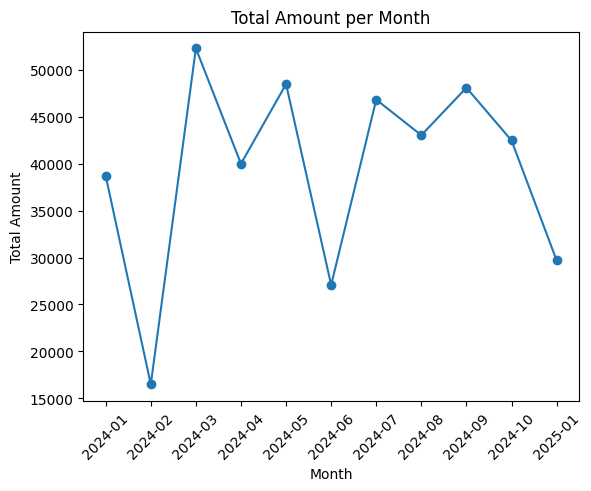

In [232]:
totalAmount_by_month=df.groupby("month_year")["TotalAmount"].sum()
month=totalAmount_by_month.index.astype(str)
amounts=totalAmount_by_month.values
plt.plot(month,amounts,marker="o")
plt.title("Total Amount per Month")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()


a new data frame was created to safely apply cleaning steps like removing outlier and missing values.  
this lets us compare monthly totals from raw with cleaned data to see how quality affects the results  
df2=df.copy

In [217]:
df2=df.copy()

In [219]:
df2=df2.drop_duplicates()

In [222]:
df2=df2.dropna(subset=['Quantity','Price'])

In [225]:
Q1_Quantity2=df2['Quantity'].quantile(0.25)
Q3_Quantity2=df2['Quantity'].quantile(0.75)
IQR_Quantity2=Q3_Quantity2-Q1_Quantity2
df2=df2[(df2['Quantity']>=Q1_Quantity2-1.5*IQR_Quantity2) & (df2['Quantity']<=Q3_Quantity2+1.5*IQR_Quantity2)]


In [227]:
Q1_price2=df2['Price'].quantile(0.25)
Q3_price2=df2['Price'].quantile(0.75)
IQR_price2=Q3_price2-Q1_price2
df2=df2[(df2['Price']>=Q1_price2-1.5*IQR_price2) & (df2['Price']<=Q3_price2+1.5*IQR_price2)]


In [229]:
df2['cleaned_total_amount']=df2['Quantity']*df2['Price']

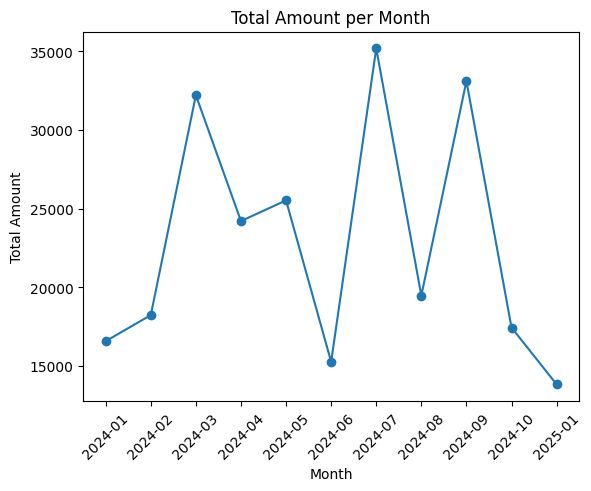

In [231]:
totalAmount_by_month2=df2.groupby("month_year")["cleaned_total_amount"].sum()
month2=totalAmount_by_month.index.astype(str)
amounts2=totalAmount_by_month2.values
plt.plot(month2,amounts2,marker="o")
plt.title("Total Amount per Month")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()

after remove duplicate record,outlier and missing values the total monthly amounts shows significant differnces compared to the raw data  
the cleaned data presents a more realistic and stable trend,avoiding the misleading impact of extreme values that were inflating the original result

# Data Quality Validation script
This script is designed to perform automated data quality checks on an e-commerce dataset.
## Purpose
this script validates data quality across key dimension :  
**completeness**:Missing values and missing months in the data range
**Accuracy** : Outlier in Quantity and price and total amount using IQR
**Consistency**: Total amount mismatch  
**Timeliness**:Orders with future dates   
**Uniqueness**:Duplicate orderID and CustomerID

## What this script check
1.   **Missing Values**  
        - check for nulls in all columns   
        - prints count of missing values per column
2.      **Missing months**   
    
3.   **TotalAmount Validation**  
        - calculates :Quantity * Unit price   
        - compare it with the existing TotalAmount  
        - Detect Mismatches and groups them by:  
         - product category
         - Customer Location
         - order Date


4.   **Duplicated Checks**  
        -Duplicate OrderID  
        -Duplicate customerUD
        -identifies fully duplicated rows

5.    **Quantity outlier**    
        -Detect Quantity Values less than 0 or greater than 100  
6.   **Price outlier**  
        -Detect price values less than 0 or grater than 1000   

7.    **outliers detection**
        -Detect outliers in Quantity and pricw and totalamount  usin IQR method
       
6.   **Futures Dates**  
        - Identifies any OrderDate values later than todays date  


## Insights from cleaned and original data  
a seperated dataframe was created to apply data cleaning operations like duplicated removal ,outlier removal.monthly totalamount was calculated befor and after cleaning.   

Key findings:  
- cleaned data showed lower and more consistent totals  
-outliers in the original data inflated monthly totals up to 50000  
-cleaned data had more stable trend,peaking around 35000    
-missing months like november and december 2025 were identified and addressed


## How to run  
1 open this script in Google Colab   
2 Make sure your dataset is located at: /content/drive/MyDrive/ecommerce-dataset.csv  
3 Run all sells from top to bottom   
4 Results will be printed directly in the output cells   

## Output
1.   clear print statements for each validation
2.   Tables showing invalid or inconsistent records  
3.   count of duplicated ,missing values and outlier

## Notes
-you can change the price and quantity limits if your business rules are different   
-Make sure the CSV file path matches your Google Drive location
















-----Missing Values-----
Missing values per column :
 OrderDate      10
Price           1
TotalAmount    20
month_year     10
dtype: int64

Number of inconsistent records equal                                   OrderID  \
1    8f9875b3-26d8-4a8c-9324-e2803f5a0204   
2    1b7a4ea3-ea9f-4eb8-9d1d-62d316222797   
3    9d3eef19-d02c-4526-9662-d87b7fe5c73f   
4    aac37d22-3bb4-4ebf-8e0e-fed315e2eb52   
5    0a30a255-2908-49c1-8b4c-f406ad21e2ab   
..                                    ...   
198  6f3454e0-d61c-4fac-b11f-899579eea857   
199  e842be8d-0a97-46f9-aaf5-0770a2081bc4   
200  599691d6-1565-4e5d-9455-81daa5d01c19   
201  c8099ccb-e5a6-4eb5-b92f-2cd145f6bee6   
202  26b19dfe-8532-4d46-8e5d-3f4285a81960   

                               CustomerID  OrderDate  \
1    ede013c6-46b3-49a7-97ea-ecc0955f3565 2024-03-30   
2    a38beec4-baf2-49b9-abcb-61c01270ff80 2024-03-13   
3    bf74c160-73fb-4c3a-93a5-e78ec99ad9bb 2024-06-01   
4    468bc959-9b09-419e-b1db-0f7729735237 2024-07-04   
5 

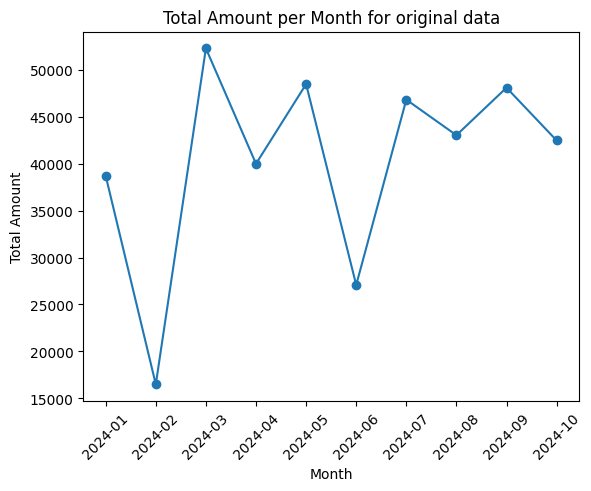

----------------------


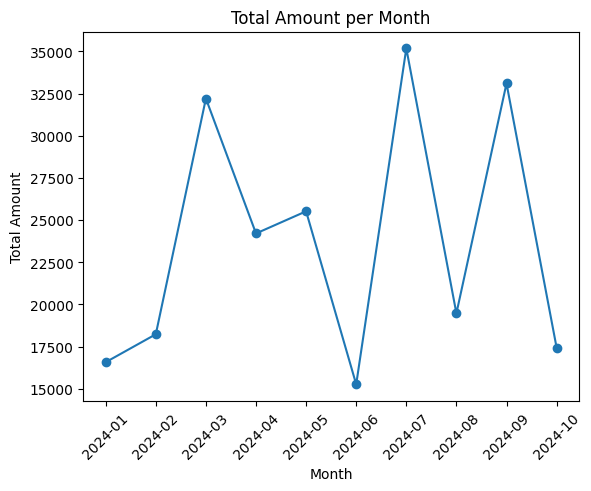

In [233]:
##final Data Quality validation script
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
##Load dataset
df=pd.read_csv("/content/drive/MyDrive/ecommerce-dataset.csv")

#Ensure that orderdate is in datetime format
df['OrderDate']=pd.to_datetime(df['OrderDate'],errors='coerce')

#Generate month-year for grouping
df["month_year"]=df['OrderDate'].dt.to_period("M")



#missing value
print("-----Missing Values-----")
missing_values=df.isnull().sum()
missing_values=missing_values[missing_values>0]
print("Missing values per column :\n",missing_values)
print()

#Total inconsistent amount:total amount=Quantity * unit price
df["calculation_total_amount"]=df['Quantity']*df['Price']
inconsistent_amount=df[np.abs(df['TotalAmount']-df['calculation_total_amount'])>1]
print(f"Number of inconsistent records equal {inconsistent_amount}")
print()

#mismatch by productcategory
mismatch_by_productcategory=inconsistent_amount['ProductCategory'].value_counts()
print("mismatch by product category \n :",mismatch_by_productcategory)
print()

#mismatch by location for the customers
mismatch_by_location=inconsistent_amount['CustomerLocation'].value_counts()
print("mismatch by customer Location \n :",mismatch_by_location)
print()


#mismatch by order date
mismatch_by_Date=inconsistent_amount['OrderDate'].value_counts().sort_values(ascending=False)
print("mismatch by order date \n",mismatch_by_Date)
print()

#Fully Duplicated check
print("-----Fully Duplicate Record-----")
print(df[df.duplicated(subset=None,keep=False)])
print()

#Duplicated CustomerID Check
print("----- Duplicated CustomerID Records-----")
print(df[df.duplicated(subset=["CustomerID"],keep=False)])
print()


#Duplicated orderID Check
print("----- Duplicated OrderID Records-----")
print(df[df.duplicated(subset=["OrderID"],keep=False)])
print()


#Accuracy check
#1 Inconsistent Quantity
print("----- Inconsistent Quantity is Quntity <0 or >100 -----")

invalid_Quantity=df[(df['Quantity']<0) | (df['Quantity']>100)]
print(f"number of Quantity outliers equal {len(invalid_Quantity)}")
if len(invalid_Quantity)>0:
  print (invalid_Quantity[['OrderID','Quantity']])
print()

#2 Inconsistent Price
print("----- Inconsistent Price is price <0 or >1000 -----")
invalid_price=df[(df["Price"]<0) | (df['Price']>1000)]
print(f"number of price outliers equal {len(invalid_price)}")
if len(invalid_price)>0:
  print (invalid_price[['OrderID','Quantity']])
print()

#check Quantity Outliers
Q1_Quantity=df['Quantity'].quantile(0.25)
Q3_Quantity=df['Quantity'].quantile(0.75)
IQR_Quantity=Q3_Quantity-Q1_Quantity
outlier_Quantity=df[(df['Quantity']<Q1_Quantity-1.5*IQR_Quantity) | (df['Quantity']>Q3_Quantity+1.5*IQR_Quantity)]
print(outlier_Quantity[["OrderID","Quantity"]])

#check price Outliers
Q1_price=df['Price'].quantile(0.25)
Q3_price=df['Price'].quantile(0.75)
IQR_price=Q3_price-Q1_price
outlier_price=df[(df['Price']<Q1_price-1.5*IQR_price) | (df['Price']>Q3_price+1.5*IQR_price)]
print(outlier_price[["OrderID","Price"]])


#Future Date check
print("----- Future dates in orderdate -----")
error_in_time=df[df['OrderDate']>pd.Timestamp.today()]
print(f"Record with order date in future {len(error_in_time)}")
if len(error_in_time)>0 :
  print(error_in_time[['OrderID','OrderDate']])

#creat clean copy for safe data cleaning
df2=df.copy()
#Remove full dupliacte rows
df2=df2.drop_duplicates()
#remove rows with missing Quantity and price
df2=df2.dropna(subset=['Quantity','Price'])

#Remove outliers using IQR for Quantity
Q1_Quantity2=df2['Quantity'].quantile(0.25)
Q3_Quantity2=df2['Quantity'].quantile(0.75)
IQR_Quantity2=Q3_Quantity2-Q1_Quantity2
df2=df2[(df2['Quantity']>=Q1_Quantity2-1.5*IQR_Quantity2) & (df2['Quantity']<=Q3_Quantity2+1.5*IQR_Quantity2)]

#Remove outliers using IQR for price
Q1_price2=df2['Price'].quantile(0.25)
Q3_price2=df2['Price'].quantile(0.75)
IQR_price2=Q3_price2-Q1_price2
df2=df2[(df2['Price']>=Q1_price2-1.5*IQR_price2) & (df2['Price']<=Q3_price2+1.5*IQR_price2)]

#Recalculate TotalAmount for clean data
df2['cleaned_total_amount']=df2['Quantity']*df2['Price']

#original monthly total
totalAmount_by_month=df.groupby("month_year")["TotalAmount"].sum()
month=totalAmount_by_month.index.astype(str)
amounts=totalAmount_by_month.values

#clean monthly total
totalAmount_by_month2=df2.groupby("month_year")["cleaned_total_amount"].sum()
month2=totalAmount_by_month.index.astype(str)
amounts2=totalAmount_by_month2.values

#create visual to comparison
plt.plot(month,amounts,marker="o")
plt.title("Total Amount per Month for original data")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()
print("----------------------")



plt.plot(month2,amounts2,marker="o")
plt.title("Total Amount per Month")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()










